### Import Libraries

In [2]:
# Manipulation Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

> **Note**: temperature change is with respect to a baseline climatology, corresponding to the period 1951–1980 (as said within [the documentation](https://www.fao.org/faostat/en/#data/ET)).

## I. Load & Explore the Data

In [3]:
# Import the data
temp = pd.read_csv("data/temperature_change_data_11-29-2021.csv")
temp.columns

Index(['Domain Code', 'Domain', 'Area Code (ISO3)', 'Area', 'Element Code',
       'Element', 'Months Code', 'Months', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description'],
      dtype='object')

In [4]:
temp.describe()

,Element Code,Months Code,Year Code,Year,Value
count,67625.0,67625.000000,67625.000000,67625.000000,65331.000000
mean,7271.0,7018.000000,1991.306248,1991.306248,0.491524
std,0.0,1.414224,17.333343,17.333343,0.820116
min,7271.0,7016.000000,1961.000000,1961.000000,-5.979000
25%,7271.0,7017.000000,1976.000000,1976.000000,-0.011000
50%,7271.0,7018.000000,1992.000000,1992.000000,0.410000
75%,7271.0,7019.000000,2006.000000,2006.000000,0.932000
max,7271.0,7020.000000,2020.000000,2020.000000,8.206000


In [5]:
temp['Area'].value_counts()

Afghanistan              300
Norfolk Island           300
Namibia                  300
Nauru                    300
Nepal                    300
                        ... 
Montenegro                75
Serbia                    75
Serbia and Montenegro     70
Sudan                     50
South Sudan               50
Name: Area, Length: 247, dtype: int64

## II. Prepare the Data

In [6]:
# Countries to keep
areas_to_keep = ["China", "Germany", "Japan", "United States of America"]

# Filter the data
evolution = temp[(temp["Flag Description"] != "Data Not Available") & 
                 (temp["Months"] == "Meteorological year") & 
                 (temp["Area"].isin(areas_to_keep))].reset_index(drop=True)

# Rename some Areas
evolution["Area"] = evolution["Area"].replace(to_replace=["United States of America"],
                                             value=["United States"])

# Group by Area and Year
evolution = evolution.groupby(["Area", "Year"])["Value"].mean().reset_index()

# Look into the dataframe
evolution.head()

,Area,Year,Value
0,China,1961,0.266
1,China,1962,-0.134
2,China,1963,0.292
3,China,1964,-0.020
4,China,1965,0.081


## III. Create the Lineplot V1 (Basic Visual)

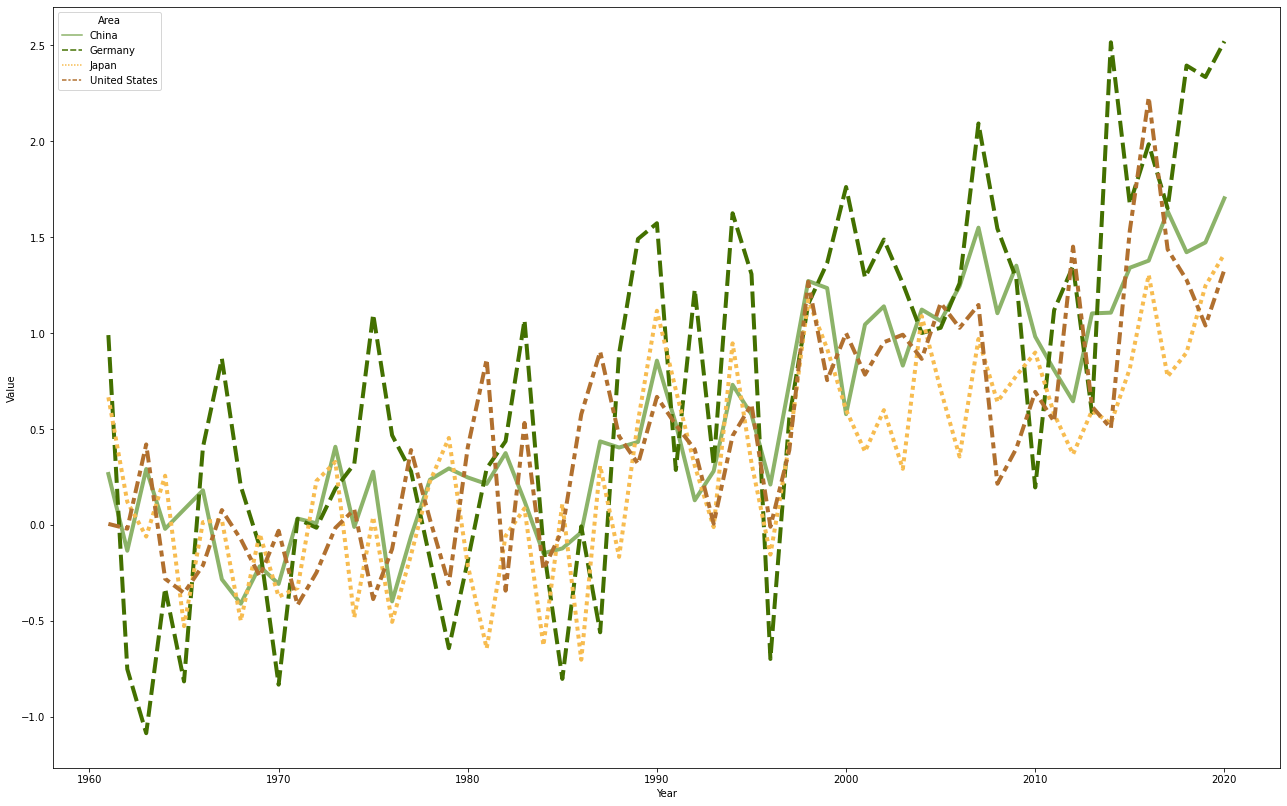

In [7]:
# Set the general figure size
plt.figure(figsize=(22, 14))

# Plot the initial linechart
line = sns.lineplot(data=evolution, x="Year", y="Value",
                    hue="Area", style="Area", lw=4,
                    palette=["#8CB369", "#437000", "#F7BC50", "#B1702F"])


## III. Create the Lineplot V2 (Add Title, Axes)

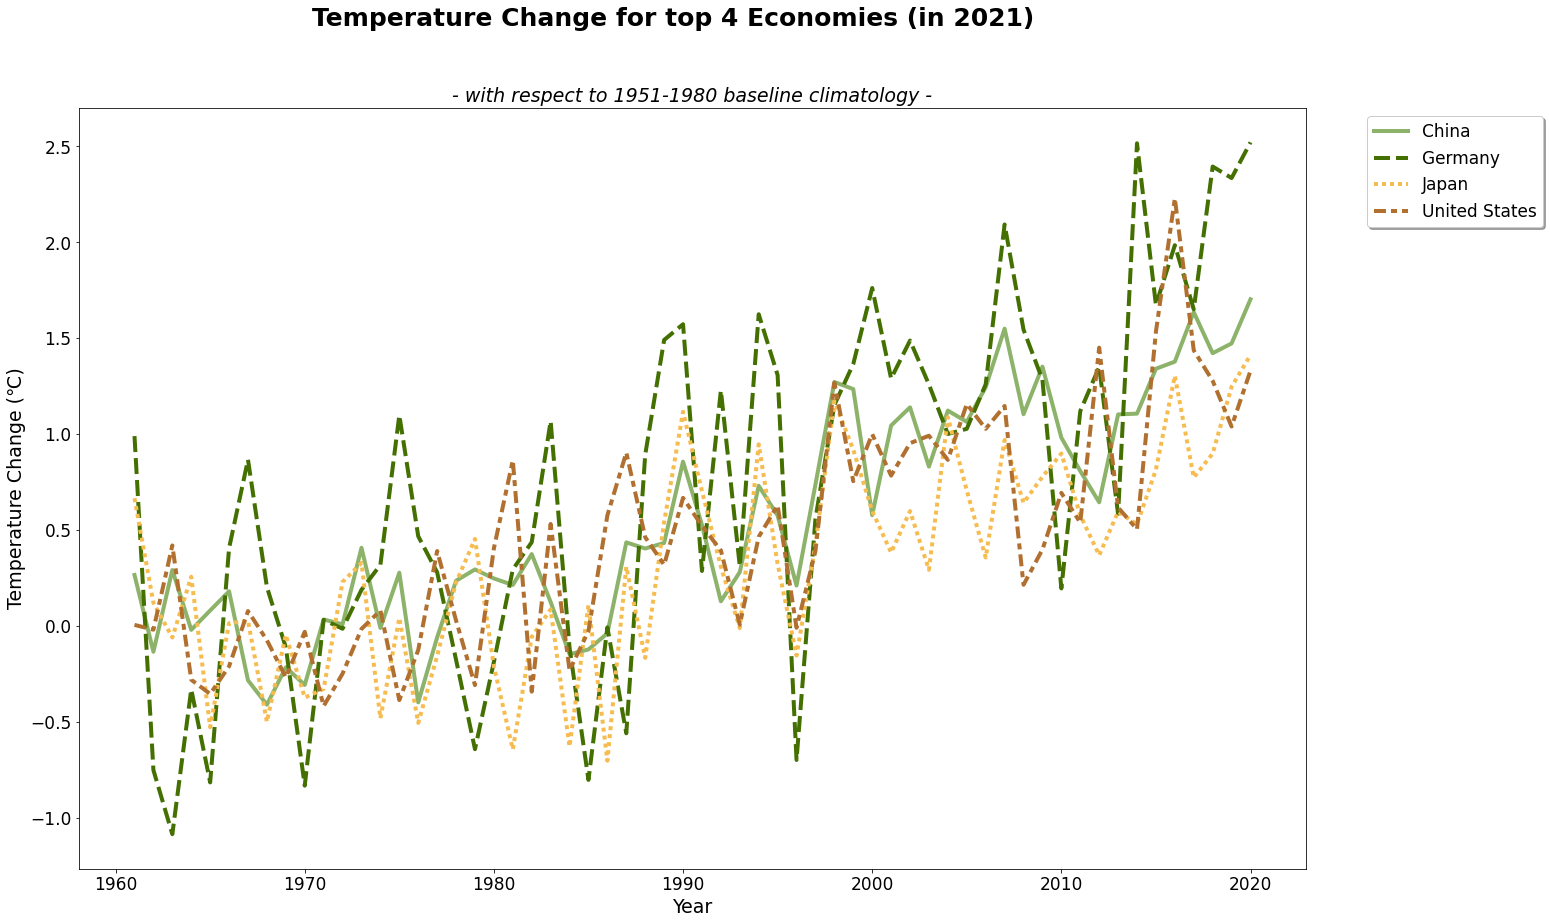

In [8]:
# Set the general figure size
plt.figure(figsize=(22, 14))

# Plot the initial linechart
line = sns.lineplot(data=evolution, x="Year", y="Value",
                    hue="Area", style="Area", lw=4,
                    palette=["#8CB369", "#437000", "#F7BC50", "#B1702F"])

# Add a general title
plt.suptitle("Temperature Change for top 4 Economies (in 2021)", fontsize=25, weight="bold")
plt.title("- with respect to 1951-1980 baseline climatology -", fontsize=19, style="italic")

# Format axis labels
plt.xlabel("Year", fontsize=19)
plt.ylabel("Temperature Change (℃)", fontsize=19)

# Format axis ticks
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

# Add a legend
leg = line.legend(fontsize=17, bbox_to_anchor= (1.2,1), shadow=1)
for legend_line in leg.get_lines():
    legend_line.set_linewidth(4)
    
    

## III. Create the Lineplot Final (Clean up & Annotate) 

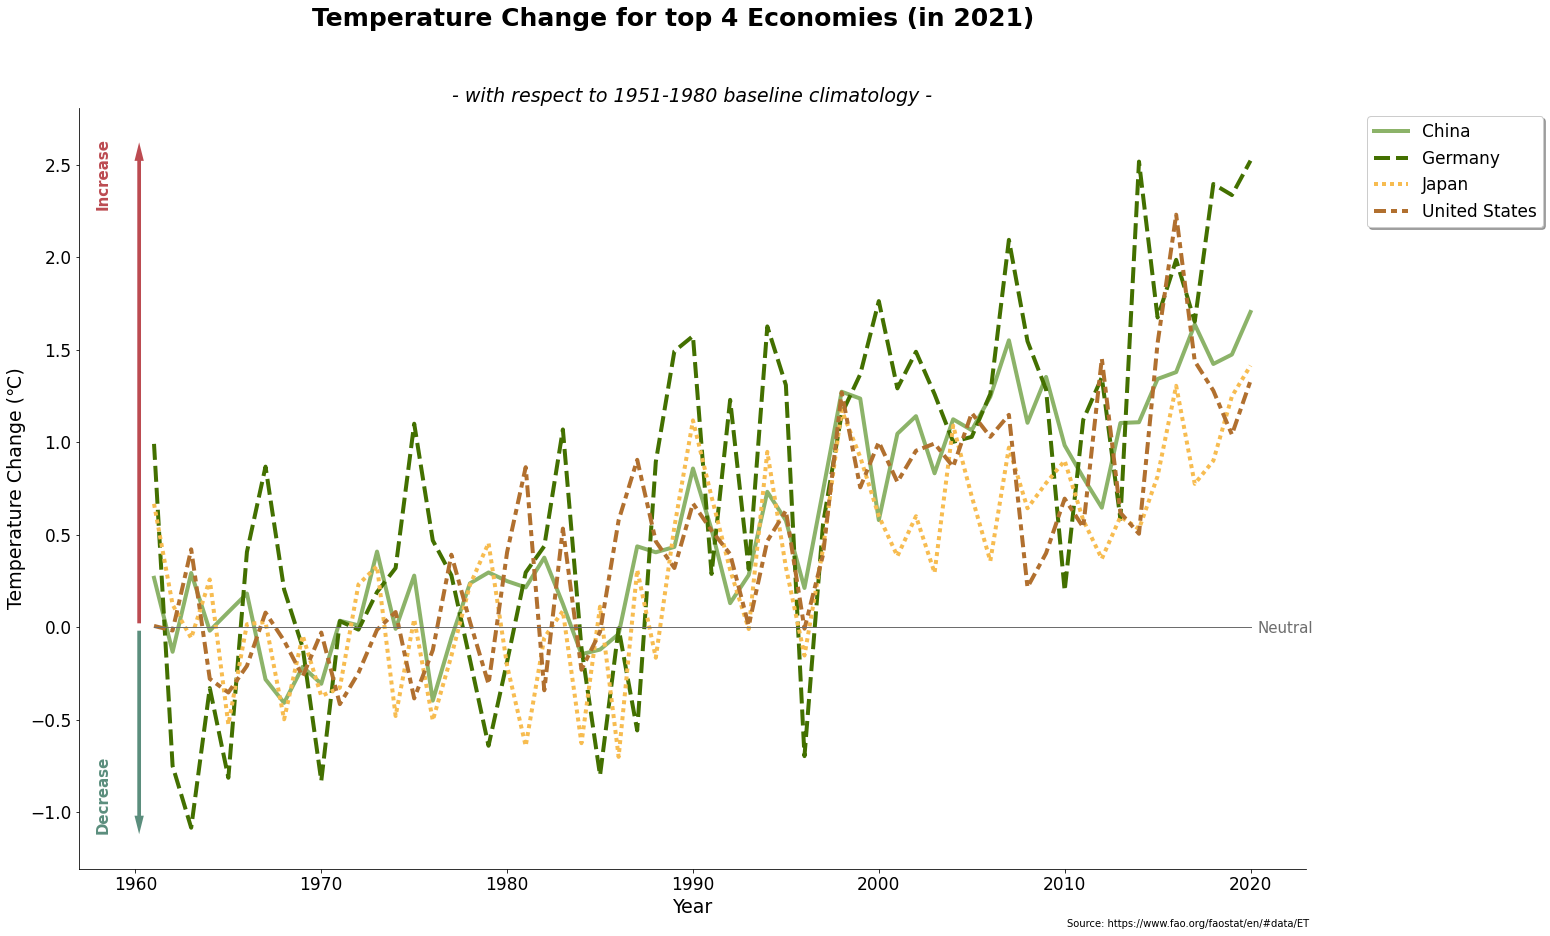

In [9]:
# Set the general figure size
plt.figure(figsize=(22, 14))

# Plot the initial linechart
line = sns.lineplot(data=evolution, x="Year", y="Value",
                    hue="Area", style="Area", lw=4,
                    palette=["#8CB369", "#437000", "#F7BC50", "#B1702F"])

# Add a general title
plt.suptitle("Temperature Change for top 4 Economies (in 2021)", fontsize=25, weight="bold")
plt.title("- with respect to 1951-1980 baseline climatology -", fontsize=19, style="italic")

# Format axis labels
plt.xlabel("Year", fontsize=19)
plt.ylabel("Temperature Change (℃)", fontsize=19)

# Format axis ticks
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

# Add a legend
leg = line.legend(fontsize=17, bbox_to_anchor= (1.2,1), shadow=1)
for legend_line in leg.get_lines():
    legend_line.set_linewidth(4)

# Despinde for better readability
sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)

# Add arrows for better visualization
plt.arrow(x=1960.2, y=0.02, dx=0, dy=2.5, width=0.2, head_width=0.5, head_length=0.1,
          facecolor='#BC4B51', edgecolor='none')
plt.arrow(x=1960.2, y=-0.02, dx=0, dy=-1, width=0.2, head_width=0.5, head_length=0.1,
          facecolor='#5B8E7D', edgecolor='none')
plt.plot([1961, 2020], [0.0, 0.0], lw=1, color="#6D6D6D")

# Add text helpers
plt.text(0.014, 0.87, 'Increase', fontsize=15, color='#BC4B51', weight="bold",
         rotation="vertical", transform=line.transAxes)
plt.text(0.014, 0.05, 'Decrease', fontsize=15, color='#5B8E7D', weight="bold",
         rotation="vertical", transform=line.transAxes)
plt.text(0.96, 0.31, 'Neutral', fontsize=15, color='#6D6D6D',
         rotation="horizontal", transform=line.transAxes)

# Add source of data
plt.annotate('Source: https://www.fao.org/faostat/en/#data/ET', (0.87,0), (-80,-50), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top')

# Save SVG
plt.savefig("Graphs/temperature_change.svg", bbox_inches='tight', dpi=300)

### Further Inquires:

* What are the areas with biggest/smallest change in temperature?
* Are there any correlations between the hottest changes and other phenomena (like land coverage, land fires, CO2 emissions etc.)
* How does the seasonal temperature change look like?
* How does this vary by continent? Particularly South America?